##  Distribution of (median imagette - median image)/median image  only for birds imagettes generated and the picture corresponding

In [6]:
#Aller voir dans le masque en attendant 
#Une autre amélioration serait de regarder les distributions pour chaque type d'oiseau
#Envoyer un message à Corentin pour vérifier que j'effectue la bonne normalisation avant de lui présenter tout


#D'abord faire un histogramme tout court des birds par folder
#Puis hist par rapport med(birds)-med(images)/med(images)

In [6]:

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import ast

import pickle

In [7]:
#dic_labels_to_num,dic_num_to_labels=dictionnaire_conversion()

n_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/"
images=pd.read_csv(n_path+"fp+an_gen_tf.csv")
images.head()

,path,filename,imagetteName,max_cat,predict_cat,xmin,xmax,ymin,ymax,former_index,IsFP,reel_classe
0,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-17-30.jpg,image_2019-04-30_18-17-30_356_51_5.jpg,0.513831,5.0,509,518,290,298,356.0,1,0
1,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-17-30.jpg,image_2019-04-30_18-17-30_295_91_5.jpg,0.914196,5.0,992,1014,321,339,295.0,1,0
2,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-17-30.jpg,image_2019-04-30_18-17-30_296_93_2.jpg,0.932135,2.0,1197,1211,319,333,296.0,0,2
3,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-17-47.jpg,image_2019-04-30_18-17-47_689_74_5.jpg,0.742045,5.0,982,987,334,339,689.0,1,0
4,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-17-47.jpg,image_2019-04-30_18-17-47_683_73_5.jpg,0.725646,5.0,853,867,339,356,683.0,1,0


In [ ]:
folder_imagettes="tf_200ep/"

liste_img_paths=[]
for i in range(len(gen_imagettes)):
    liste_img_paths.append(n_path+folder_imagettes+gen_imagettes["imagetteName"].iloc[i])

gen_imagettes["img_paths"]=liste_img_paths
gen_imagettes.head()

gen_imagettes["class"]="autre"

for i in range(len(gen_imagettes)):
    if gen_imagettes["IsFP"].iloc[i]==0:
        gen_imagettes["class"].iloc[i]=dic_num_to_labels[gen_imagettes["reel_classe"].iloc[i]]
    
gen_imagettes.head()  

In [13]:
#4ème canal 0 ou 1 si ça change ou non
#Ou sinon en amont du seuillage de poucentage 

#Rajouter masque 
#Refaire avec le meilleur modèle et voir ce que ça change

#Positionner les changements 

#Pour la distance trouver comment évaluer sur le terrain sur quelques images .
#Je regarde si la repésentation des oiseaux sur la carte et sur la prise de vue
#Positionner masque sur la carte



#Regarder modèle directement en hsv 
#Eventuellement rajouter 3 cannaux 
#D'abord rajouter avec  ou 1 avec un canal
#3 canaux supp avec les pixels initiales et celles qui changent


#Difference comme un canal 

#Que les pixels qui changent ou bien leur différence
#Différence normale

## Dossier 0

In [23]:
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_0']
liste_images_fold0=list(images_0["filename"].unique())

fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_0/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/tf_200ep/"
#Enlever les non oiseau
match_animals=images_0[images_0["IsFP"]==0]
FP_birds=images_0[images_0["IsFP"]==1]
birds_index=[2,3,5,6]
match_birds=match_animals[match_animals["reel_classe"].isin(birds_index)]




birds_norm_liste=[]
FP_birds_norm_liste=[]




for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    birds_liste=match_birds["imagetteName"][match_birds["filename"]==image_path]
    birds_liste=list(birds_liste.unique())
    
    FP_liste=FP_birds["imagetteName"][FP_birds["filename"]==image_path]
    FP_liste=list(FP_liste.unique())
    
    for imagette in birds_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

        
        
        
        
        
        
    for imagette in FP_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        FP_birds_norm_liste.append(birds_norm)

        
with open("list0_bm.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list0_fp.txt", "wb") as fp:   #Pickling
    pickle.dump(FP_birds_norm_liste, fp)

'\n\n\nwith open("list0_bm.txt", "wb") as fp:   #Pickling\n    pickle.dump(birds_norm_liste, fp)\n    \n    \nwith open("list0_bm.txt", "rb") as fp:   # Unpickling\n    b = pickle.load(fp)\n'

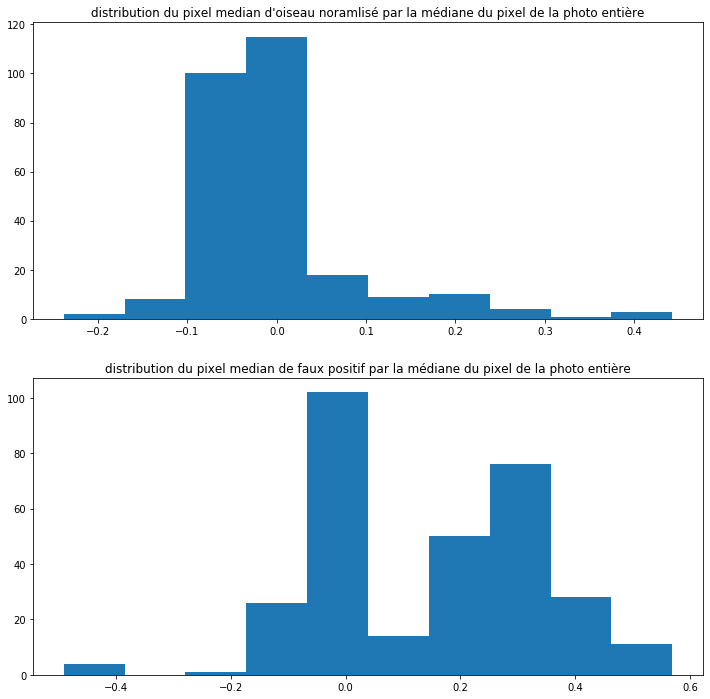

In [60]:
with open("list0_bm.txt", "rb") as fp:   # Unpickling
    bm_0 = pickle.load(fp)
    
with open("list0_fp.txt", "rb") as fp:   # Unpickling
    fp_0 = pickle.load(fp)



plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_0)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière")
plt.hist(fp_0);

## Dossier 1

In [27]:
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())

fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/tf_200ep/"
#Enlever les non oiseau
match_animals=images_0[images_0["IsFP"]==0]
FP_birds=images_0[images_0["IsFP"]==1]
birds_index=[2,3,5,6]
match_birds=match_animals[match_animals["reel_classe"].isin(birds_index)]




birds_norm_liste=[]
FP_birds_norm_liste=[]




for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    birds_liste=match_birds["imagetteName"][match_birds["filename"]==image_path]
    birds_liste=list(birds_liste.unique())
    
    FP_liste=FP_birds["imagetteName"][FP_birds["filename"]==image_path]
    FP_liste=list(FP_liste.unique())
    
    for imagette in birds_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

        
        
        
        
        
        
    for imagette in FP_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        FP_birds_norm_liste.append(birds_norm)

with open("list1_bm.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list1_fp.txt", "wb") as fp:   #Pickling
    pickle.dump(FP_birds_norm_liste, fp)

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in double_scalars


'\n\n\nwith open("list0_bm.txt", "wb") as fp:   #Pickling\n    pickle.dump(birds_norm_liste, fp)\n    \n    \nwith open("list0_bm.txt", "rb") as fp:   # Unpickling\n    b = pickle.load(fp)\n'

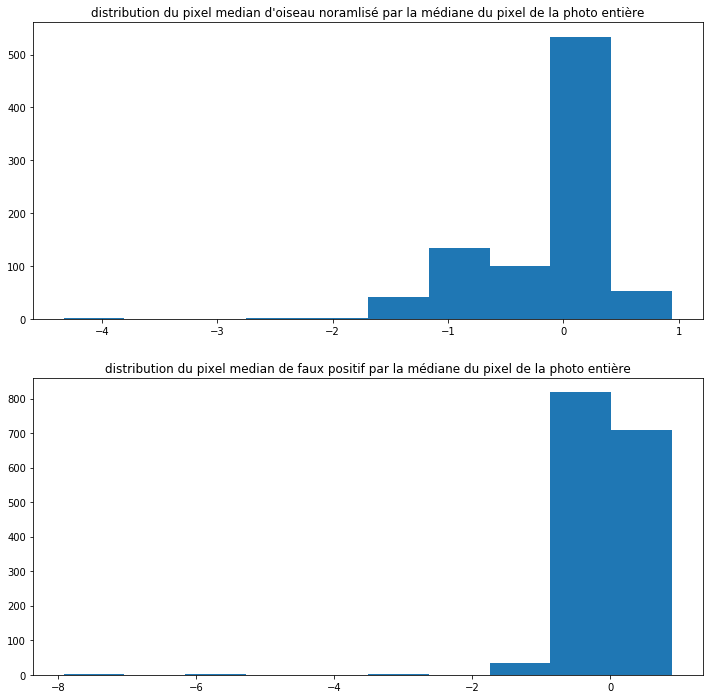

In [58]:
with open("list1_bm.txt", "rb") as fp:   # Unpickling
    bm_1 = pickle.load(fp)
    
with open("list1_fp.txt", "rb") as fp:   # Unpickling
    fp_1 = pickle.load(fp)

bm_1_filtre=[i for i in bm_1 if i>-100]
fp_1_filtre=[i for i in fp_1 if i>-100]



plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_1_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière")
plt.hist(fp_1_filtre);


nombre oiseaux capturés : 874
nombre oiseaux capturés à l'intérieur des outliers : 593


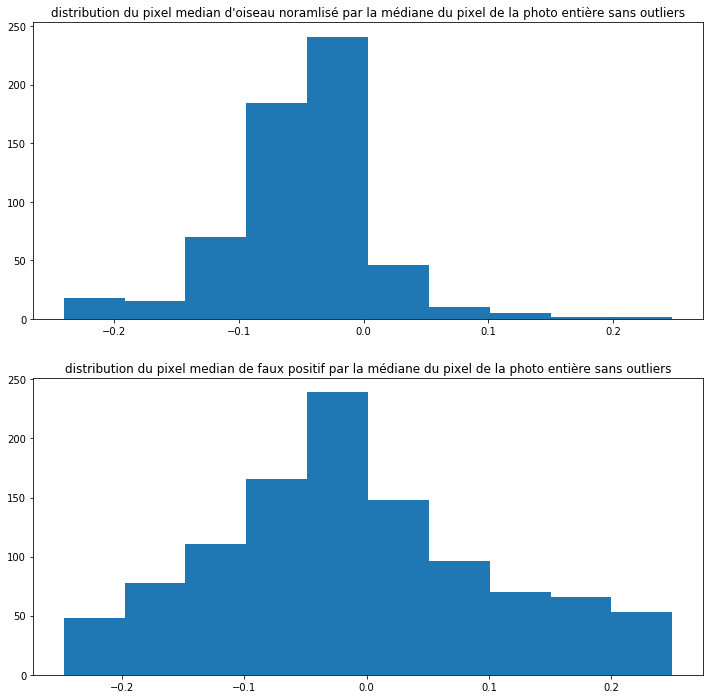

In [64]:
with open("list1_bm.txt", "rb") as fp:   # Unpickling
    bm_1 = pickle.load(fp)
    
with open("list1_fp.txt", "rb") as fp:   # Unpickling
    fp_1 = pickle.load(fp)

bm_1_filtre=[i for i in bm_1 if (i>-0.25 and i<0.25)]
fp_1_filtre=[i for i in fp_1 if (i>-0.25 and i<0.25)]

print("nombre oiseaux capturés :", len(bm_1))
print("nombre oiseaux capturés à l'intérieur des outliers :", len(bm_1_filtre))

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière sans outliers")
plt.hist(bm_1_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière sans outliers")
plt.hist(fp_1_filtre);

## Dossier 2

In [30]:
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_2']
liste_images_fold0=list(images_0["filename"].unique())

fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_2/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/tf_200ep/"
#Enlever les non oiseau
match_animals=images_0[images_0["IsFP"]==0]
FP_birds=images_0[images_0["IsFP"]==1]
birds_index=[2,3,5,6]
match_birds=match_animals[match_animals["reel_classe"].isin(birds_index)]




birds_norm_liste=[]
FP_birds_norm_liste=[]




for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    birds_liste=match_birds["imagetteName"][match_birds["filename"]==image_path]
    birds_liste=list(birds_liste.unique())
    
    FP_liste=FP_birds["imagetteName"][FP_birds["filename"]==image_path]
    FP_liste=list(FP_liste.unique())
    
    for imagette in birds_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

        
        
        
        
        
        
    for imagette in FP_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        FP_birds_norm_liste.append(birds_norm)

        
with open("list2_bm.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list2_fp.txt", "wb") as fp:   #Pickling
    pickle.dump(FP_birds_norm_liste, fp)

'\n\n\nwith open("list0_bm.txt", "wb") as fp:   #Pickling\n    pickle.dump(birds_norm_liste, fp)\n    \n    \nwith open("list0_bm.txt", "rb") as fp:   # Unpickling\n    b = pickle.load(fp)\n'

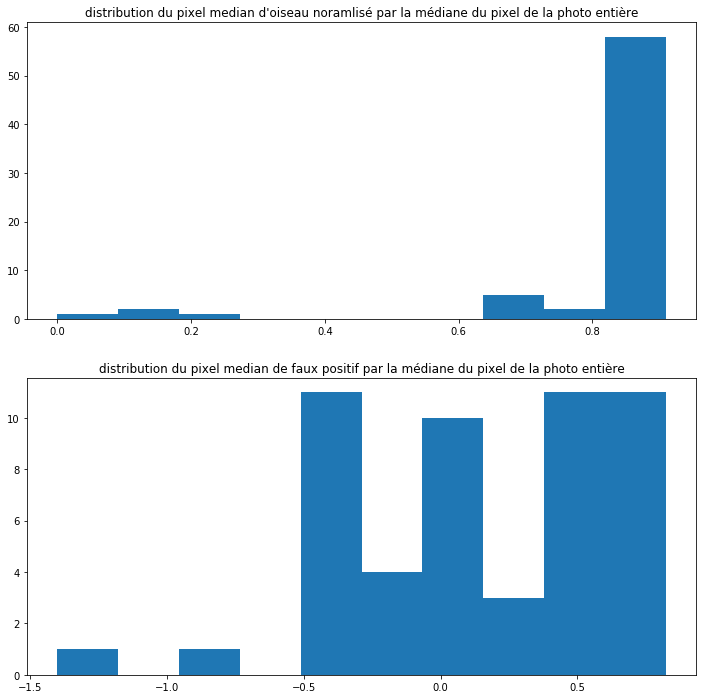

In [56]:
with open("list2_bm.txt", "rb") as fp:   # Unpickling
    bm_2 = pickle.load(fp)
    
with open("list2_fp.txt", "rb") as fp:   # Unpickling
    fp_2 = pickle.load(fp)

bm_2_filtre=[i for i in bm_2 if i>-100]
fp_2_filtre=[i for i in fp_2 if i>-100]





plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_2_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière")
plt.hist(fp_2_filtre);


## Dossier 3

In [38]:
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_3']
liste_images_fold0=list(images_0["filename"].unique())

fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_3/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/tf_200ep/"
#Enlever les non oiseau
match_animals=images_0[images_0["IsFP"]==0]
FP_birds=images_0[images_0["IsFP"]==1]
birds_index=[2,3,5,6]
match_birds=match_animals[match_animals["reel_classe"].isin(birds_index)]




birds_norm_liste=[]
FP_birds_norm_liste=[]




for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    birds_liste=match_birds["imagetteName"][match_birds["filename"]==image_path]
    birds_liste=list(birds_liste.unique())
    
    FP_liste=FP_birds["imagetteName"][FP_birds["filename"]==image_path]
    FP_liste=list(FP_liste.unique())
    
    for imagette in birds_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

        
        
        
        
        
        
    for imagette in FP_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        FP_birds_norm_liste.append(birds_norm)

        
with open("list3_bm.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list3_fp.txt", "wb") as fp:   #Pickling
    pickle.dump(FP_birds_norm_liste, fp)

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars


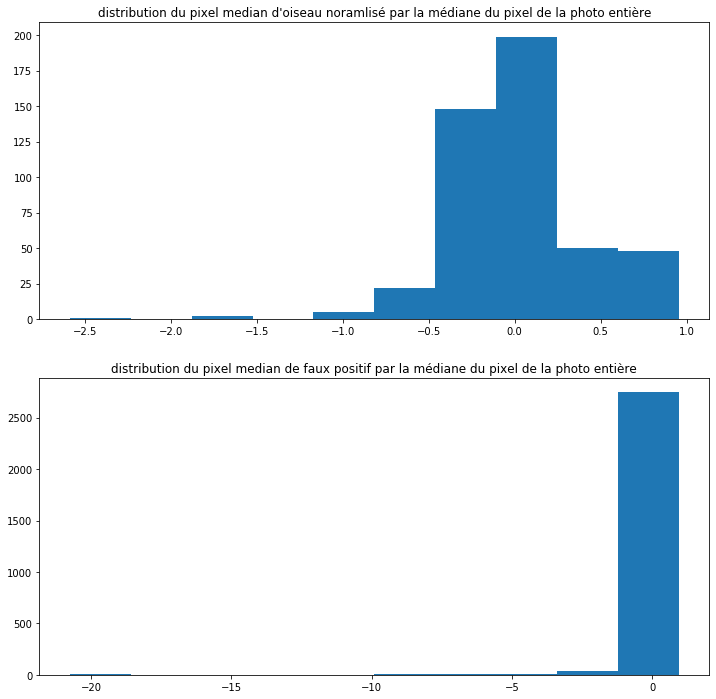

In [53]:
with open("list3_bm.txt", "rb") as fp:   # Unpickling
    bm_3 = pickle.load(fp)
    
with open("list3_fp.txt", "rb") as fp:   # Unpickling
    fp_3 = pickle.load(fp)

bm_3_filtre=[i for i in bm_3 if i>-100]
fp_3_filtre=[i for i in fp_3 if i>-100]





plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_3_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière")
plt.hist(fp_3_filtre);


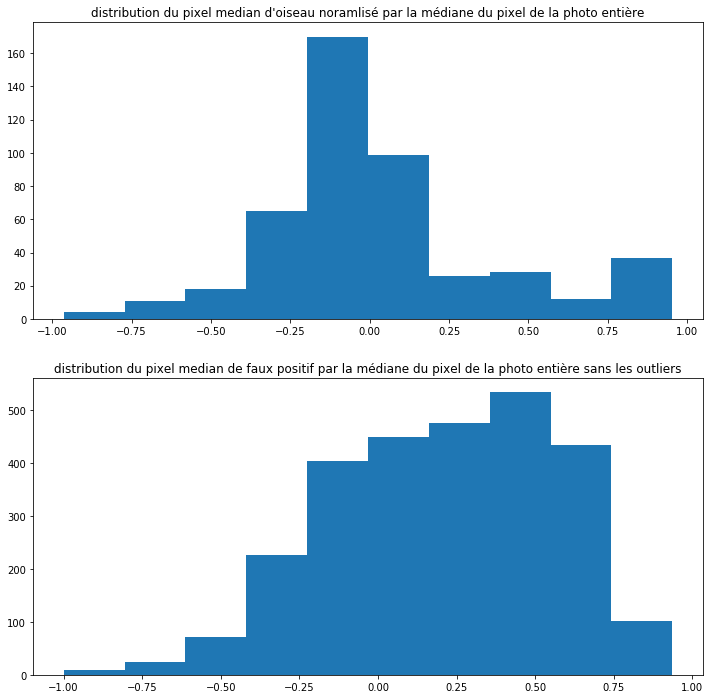

In [63]:
with open("list3_bm.txt", "rb") as fp:   # Unpickling
    bm_3 = pickle.load(fp)
    
with open("list3_fp.txt", "rb") as fp:   # Unpickling
    fp_3 = pickle.load(fp)

bm_3_filtre=[i for i in bm_3 if (i>-1 and i<1)]
fp_3_filtre=[i for i in fp_3 if (i>-1 and i<1)]





plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_3_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière sans les outliers")
plt.hist(fp_3_filtre);


## Dossier 4

In [44]:
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_4']
liste_images_fold0=list(images_0["filename"].unique())

fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_4/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Annotation_automatique/tf_200ep/"
#Enlever les non oiseau
match_animals=images_0[images_0["IsFP"]==0]
FP_birds=images_0[images_0["IsFP"]==1]
birds_index=[2,3,5,6]
match_birds=match_animals[match_animals["reel_classe"].isin(birds_index)]




birds_norm_liste=[]
FP_birds_norm_liste=[]




for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    birds_liste=match_birds["imagetteName"][match_birds["filename"]==image_path]
    birds_liste=list(birds_liste.unique())
    
    FP_liste=FP_birds["imagetteName"][FP_birds["filename"]==image_path]
    FP_liste=list(FP_liste.unique())
    
    for imagette in birds_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

        
        
        
        
        
        
    for imagette in FP_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        FP_birds_norm_liste.append(birds_norm)

        
with open("list4_bm.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list4_fp.txt", "wb") as fp:   #Pickling
    pickle.dump(FP_birds_norm_liste, fp)

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars


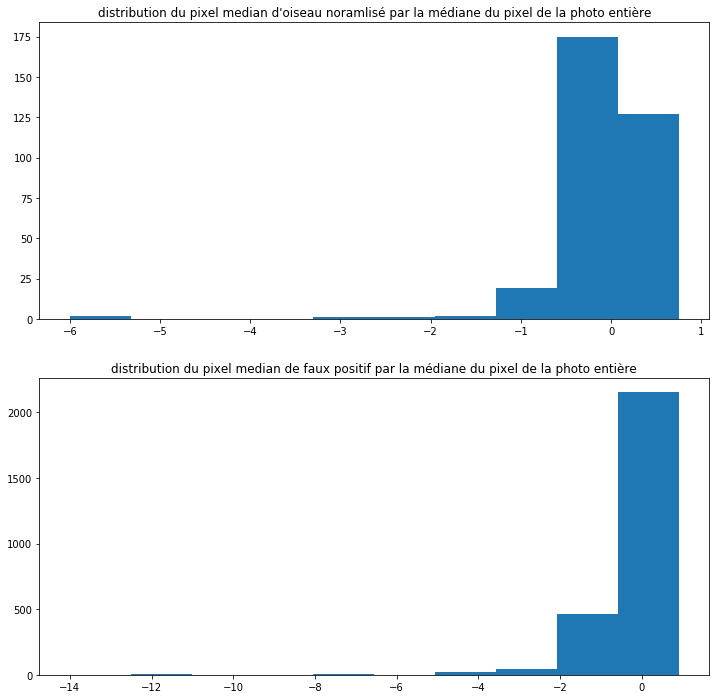

In [50]:
with open("list4_bm.txt", "rb") as fp:   # Unpickling
    bm_4 = pickle.load(fp)
    
with open("list4_fp.txt", "rb") as fp:   # Unpickling
    fp_4 = pickle.load(fp)

bm_4_filtre=[i for i in bm_4 if i>-100]
fp_4_filtre=[i for i in fp_4 if i>-100]





plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière")
plt.hist(bm_4_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière")
plt.hist(fp_4_filtre);


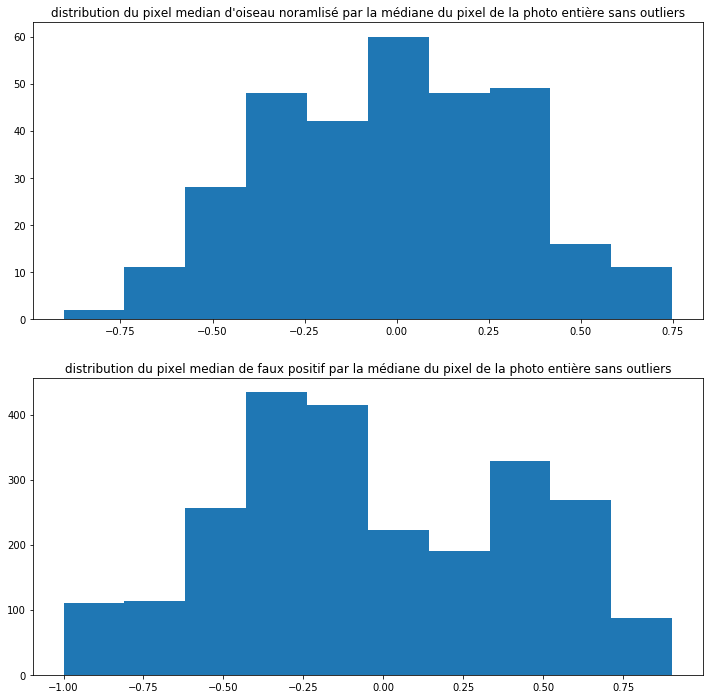

In [49]:
with open("list4_bm.txt", "rb") as fp:   # Unpickling
    bm_4 = pickle.load(fp)
    
with open("list4_fp.txt", "rb") as fp:   # Unpickling
    fp_4 = pickle.load(fp)

bm_4_filtre=[i for i in bm_4 if (i>-1 and i<1)]
fp_4_filtre=[i for i in fp_4 if (i>-1 and i<1)]





plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("distribution du pixel median d'oiseau noramlisé par la médiane du pixel de la photo entière sans outliers")
plt.hist(bm_4_filtre)
plt.subplot(2,1,2)
plt.title("distribution du pixel median de faux positif par la médiane du pixel de la photo entière sans outliers")
plt.hist(fp_4_filtre);
